# World Top Restaurant Analysis with plotly

![title](https://dynamic-media-cdn.tripadvisor.com/media/photo-o/17/09/18/3e/cascara-coffee-cocktail.jpg)

# Table Of Content

1. [**Data Initial Loading and Inspection**](#section1)
2. [**Initial Data Clean-up**](#section2)
   1. [missing values](#subsection1)
   2. [correction of typographical errors](#subsection2)
   3. [Verification and Remove Duplicates](#subsection3)
3. [**Exploratory analysis (EDA)**](#section3)
   1. [⭐ General Information](#subsection4)
   2. [⭐ Kitchen](#subsection5)
   3. [⭐ Analysis "Quality & Prestige"](#subsection6).
   4. [⭐ Economic analysis](#subsection7)
   5. [⭐ Geographic analysis](#subsection8)
   6. [⭐ Quality & reputation](#subsection9)
   7. [⭐ Heatmap of Numerical variable](#subsection10)
4. [**Outliers**](#section4)
5. [**Feature Enginering**](#section5)
6. [**Digital variable transformation (log/sqrt)**](#section6)

<a id="section1"></a>

# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>1) Data Initial Loading and Inspection<h1>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings("ignore")


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import plotly.io as pio
pio.renderers.default = "notebook_connected"



#import plotly.io as pio
#pio.renderers.default = "notebook"

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df=pd.read_csv("/kaggle/input/world-top-resturants/world_top_restaurants_dataset.csv")
df.head()

,Restaurant_Name,City,Country,Cuisine_Type,Michelin_Stars,Average_Price_USD,Chef,Established_Year,Seating_Capacity,Rating,Signature_Dish,Years_Operating,Price_Category,Star_Category,Continent
0,Osteria Francescana,Modena,Italy,Italian Contemporary,3,320,Massimo Bottura,1995,28,4.9,Five Ages of Parmigiano,30,Luxury,Three Stars,Europe
1,Odette,Singapore,Singapore,French Contemporary,3,320,Julien Royer,2008,32,4.9,Hokkaido Sea Urchin,17,Luxury,Three Stars,Asia
2,The French Laundry,Yountville,USA,French,3,390,Thomas Keller,1994,60,4.9,Oysters and Pearls,31,Luxury,Three Stars,North America
3,Arpège,Paris,France,French Vegetarian,3,425,Alain Passard,1986,40,4.9,Heirloom Tomatoes,39,Ultra-Luxury,Three Stars,Europe
4,Mirazur,Menton,France,Mediterranean,3,350,Mauro Colagreco,1991,36,4.8,Salt Crusted Beetroot,34,Luxury,Three Stars,Europe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_Name    50 non-null     object 
 1   City               50 non-null     object 
 2   Country            50 non-null     object 
 3   Cuisine_Type       50 non-null     object 
 4   Michelin_Stars     50 non-null     int64  
 5   Average_Price_USD  50 non-null     int64  
 6   Chef               50 non-null     object 
 7   Established_Year   50 non-null     int64  
 8   Seating_Capacity   50 non-null     int64  
 9   Rating             50 non-null     float64
 10  Signature_Dish     50 non-null     object 
 11  Years_Operating    50 non-null     int64  
 12  Price_Category     50 non-null     object 
 13  Star_Category      50 non-null     object 
 14  Continent          50 non-null     object 
dtypes: float64(1), int64(5), object(9)
memory usage: 6.0+ KB


In [5]:
df.dtypes.value_counts()

object     9
int64      5
float64    1
Name: count, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Michelin_Stars,50.0,1.920,1.192494,0.0,1.00,2.0,3.00,3.0
Average_Price_USD,50.0,281.060,103.578110,85.0,212.50,282.5,323.75,570.0
Established_Year,50.0,2001.780,17.962876,1897.0,1998.50,2006.5,2010.75,2017.0
Seating_Capacity,50.0,41.960,14.699660,10.0,30.50,45.0,50.00,80.0
Rating,50.0,4.702,0.109712,4.5,4.60,4.7,4.80,4.9
Years_Operating,50.0,23.220,17.962876,8.0,14.25,18.5,26.50,128.0


In [7]:
df.describe(include="object")

,Restaurant_Name,City,Country,Cuisine_Type,Chef,Signature_Dish,Price_Category,Star_Category,Continent
count,50,50,50,50,50,50,50,50,50
unique,50,34,19,36,50,50,4,4,4
top,Osteria Francescana,Paris,USA,French Contemporary,Massimo Bottura,Five Ages of Parmigiano,Luxury,Three Stars,Europe
freq,1,4,9,4,1,1,28,22,25


In [8]:
!pip install simple_colors
#columns=['Restaurant_Name', 'City', 'Country', 'Cuisine_Type', 'Michelin_Stars',
#       'Average_Price_USD', 'Chef', 'Seating_Capacity', 'Rating',
#       'Signature_Dish', 'Years_Operating', 'Price_Category', 'Star_Category',
#       'Continent', 'expensive_or_not', 'Latitude', 'Longitude',
#       'price_per_star', 'experience_score', 'quality_index', 'price_log',
#       'prestige_score', 'seats_per_star', 'restaurant_category_age']

#for col in columns:
#  x=df[col].value_counts().reset_index()[col].count()
#  print(f"{col} a {x} valeurs uniques")




from simple_colors import *
import numpy as np
for column in df:
    unique_value=np.unique(df[column])
    nr_value=len(unique_value)
    if nr_value<10:
        print("the number of values for features is",green('{}:{} --{}','bold').format(column,nr_value,unique_value))
    else:
        print("the number of values for features is",red('{}:{}','bold').format(column,nr_value))

the number of values for features is Restaurant_Name:50
the number of values for features is City:34
the number of values for features is Country:19
the number of values for features is Cuisine_Type:36
the number of values for features is Michelin_Stars:4 --[0 1 2 3]
the number of values for features is Average_Price_USD:38
the number of values for features is Chef:50
the number of values for features is Established_Year:26
the number of values for features is Seating_Capacity:26
the number of values for features is Rating:5 --[4.5 4.6 4.7 4.8 4.9]
the number of values for features is Signature_Dish:50
the number of values for features is Years_Operating:26
the number of values for features is Price_Category:4 --['Fine Dining' 'Luxury' 'Premium' 'Ultra-Luxury']
the number of values for features is Star_Category:4 --['No Stars' 'One Star' 'Three Stars' 'Two Stars']
the number of values for features is Continent:4 --['Asia' 'Europe' 'North America' 'South America']


<a id="section2"></a>
# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>2) Initial Data Clean-up<h1>

<a id="subsection1"></a>
## 2.1. missing values

In [9]:
df.isnull().sum()

Restaurant_Name      0
City                 0
Country              0
Cuisine_Type         0
Michelin_Stars       0
Average_Price_USD    0
Chef                 0
Established_Year     0
Seating_Capacity     0
Rating               0
Signature_Dish       0
Years_Operating      0
Price_Category       0
Star_Category        0
Continent            0
dtype: int64

<Axes: >

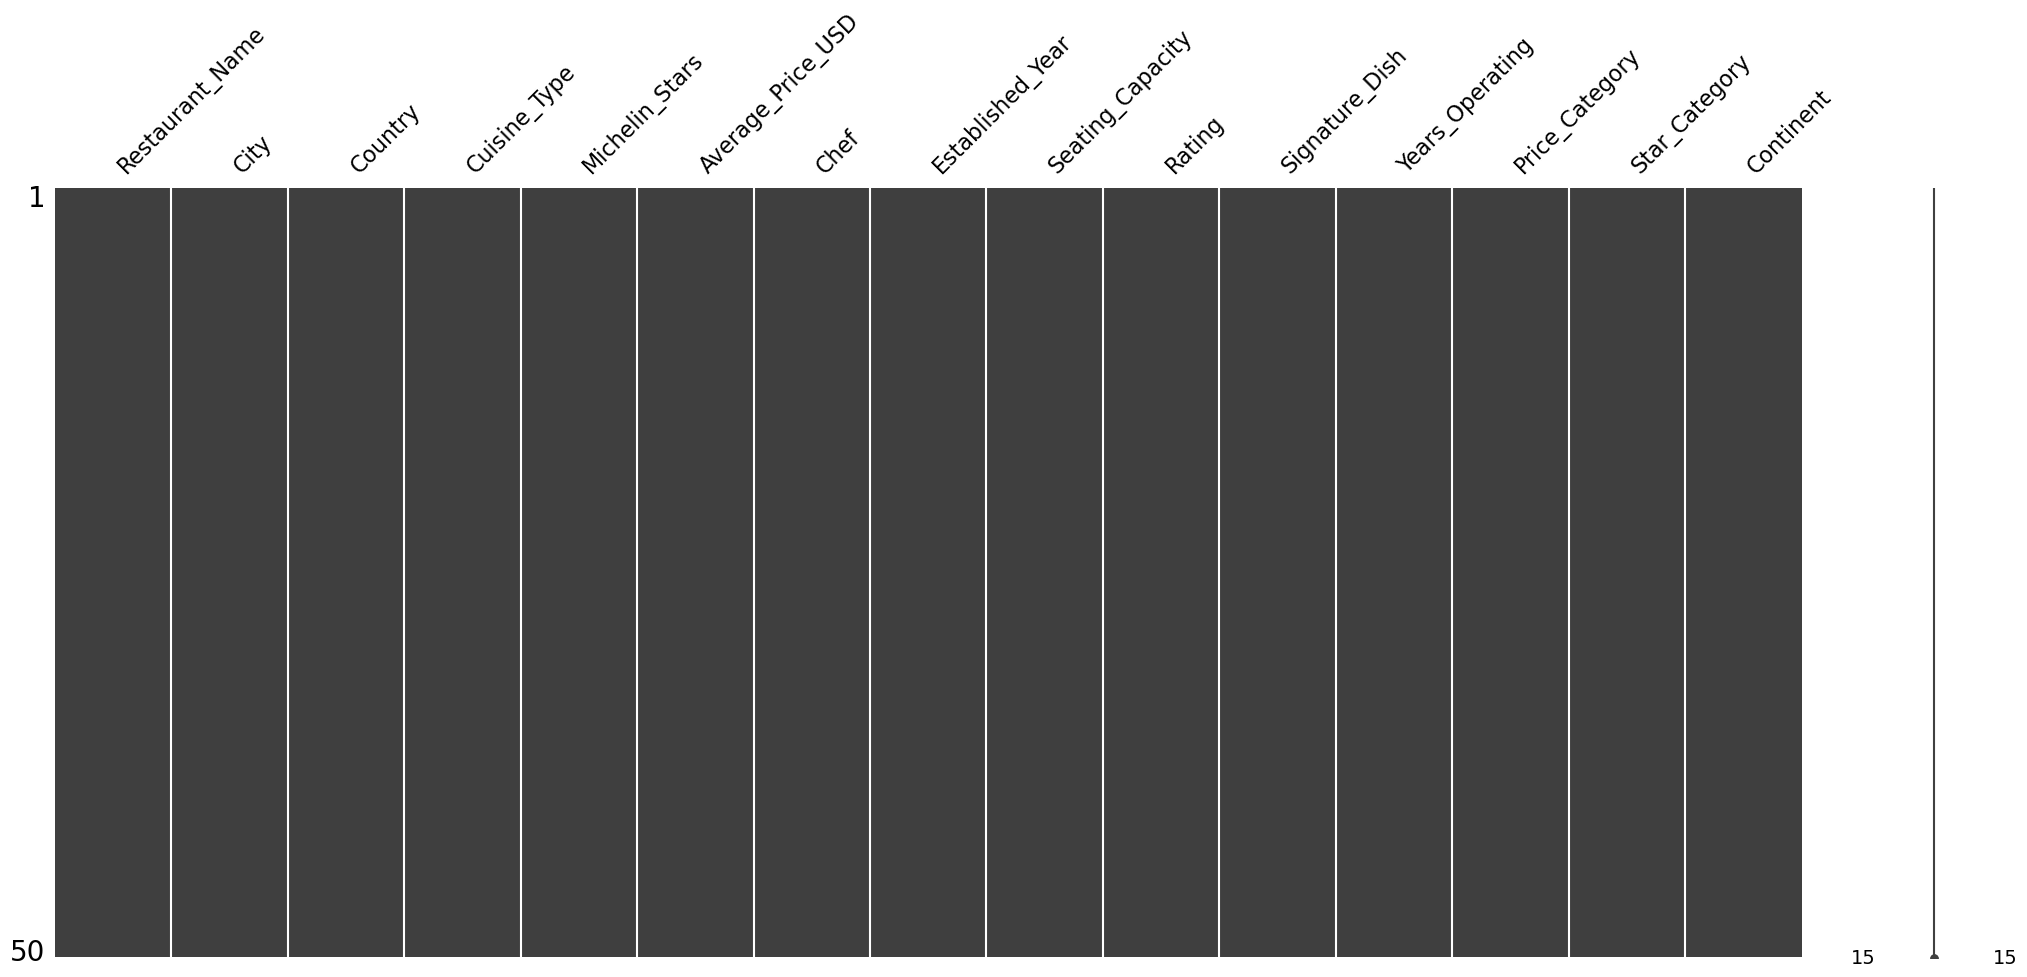

In [10]:
mno.matrix(df)

<a id="subsection2"></a>
## 2.2. correction of typographical errors

In [11]:
df.City.value_counts()

City
Paris              4
Singapore          3
Copenhagen         3
New York           3
Tokyo              3
Bangkok            2
London             2
Lima               2
Mexico City        2
San Francisco      2
Modena             1
San Sebastián      1
Dénia              1
Rome               1
Stockholm          1
Menton             1
Alba               1
Yountville         1
Shanghai           1
Larrabetzu         1
Rubano             1
Chicago            1
Girona             1
Healdsburg         1
Berlin             1
Vienna             1
Axpe               1
Errenteria         1
Barcelona          1
Hong Kong          1
Santiago           1
Pocantico Hills    1
Moscow             1
Bogotá             1
Name: count, dtype: int64

In [12]:
#df.Cuisine_Type.value_counts()
df.Cuisine_Type=df.Cuisine_Type.replace({
    "Contemporary French":"French Contemporary",
    "Italian":"Italian Contemporary",
})

In [13]:
df.drop(columns={"Established_Year"},inplace=True,axis=1)

<a id="subsection3"></a>
## 2.3. Verification and Remove Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

<a id="section3"></a>
# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>3) Exploratory analysis (EDA)<h1>

<a id="subsection4"></a>
## 1. ⭐ General Information

**Number of restaurants by country**

In [15]:
print("Nombre des restaurants sont :",df.Restaurant_Name.value_counts().sum())

Nombre des restaurants sont : 50


In [16]:
df["Country"].value_counts().reset_index()

,Country,count
0,USA,9
1,Spain,7
2,France,5
3,Italy,4
4,Singapore,3
5,Denmark,3
6,Japan,3
7,Thailand,2
8,Mexico,2
9,Peru,2


**Distribution by continent**

In [17]:
continent=df["Continent"].value_counts().reset_index()
continent

,Continent,count
0,Europe,25
1,North America,11
2,Asia,10
3,South America,4


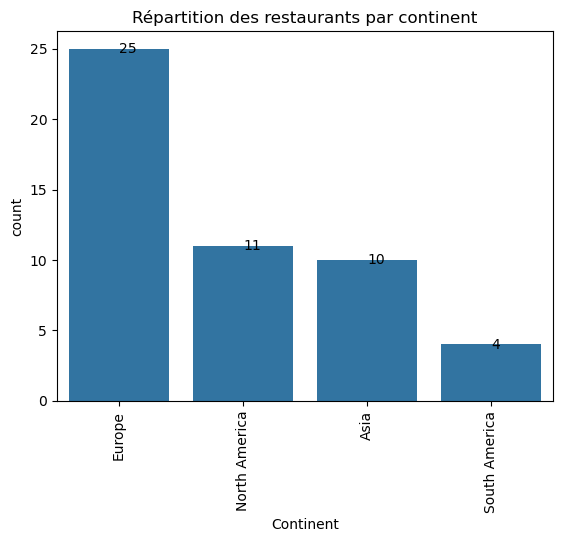

In [18]:
fig=sns.barplot(continent,x="Continent",y="count")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
fig.set(title="Répartition des restaurants par continent")
for index, row in continent.iterrows():
    fig.text(index,row["count"],row["count"], color='black',ha="left",va="center")

plt.show()

**Top 10 oldest restaurants**

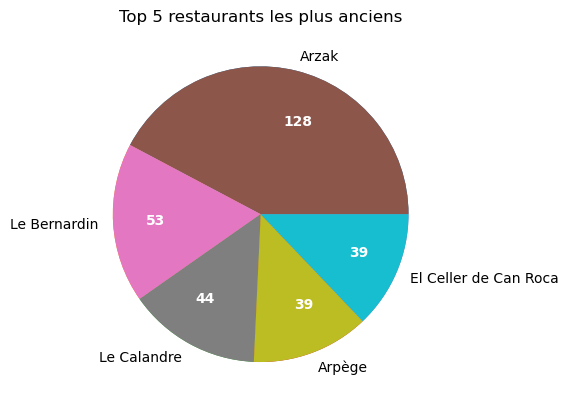

In [19]:
ancien=df.sort_values("Years_Operating",ascending=False).head(5)
plt.pie(ancien["Years_Operating"],labels=ancien["Restaurant_Name"])
plt.title("Top 5 oldest restaurants")
plt.pie(
    ancien["Years_Operating"],
    labels=[f"{v}" for v in ancien["Years_Operating"]],  # juste les valeurs
    labeldistance=0.65,               # centrer les valeurs dans le camembert
    textprops={'color': 'white', 'weight': 'bold'}
)

plt.show()

**Top 10 most expensive**

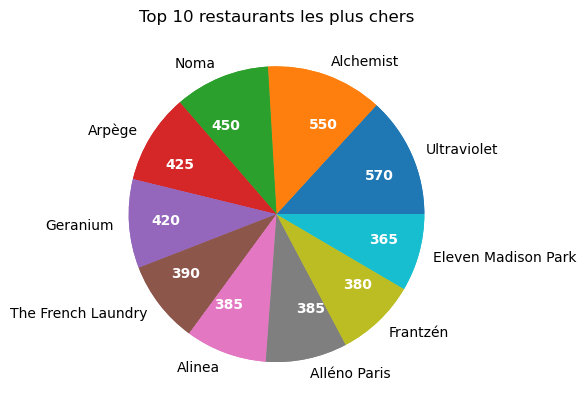

In [20]:
expensive_resto=df.sort_values("Average_Price_USD",ascending=False).head(10)
plt.pie(expensive_resto["Average_Price_USD"],labels=expensive_resto["Restaurant_Name"])
plt.title("Top 10 most expensive restaurants")
plt.pie(
    expensive_resto["Average_Price_USD"],
    labels=[f"{v}" for v in expensive_resto["Average_Price_USD"]],  # juste les valeurs
    labeldistance=0.65,               # centrer les valeurs dans le camembert
    textprops={'color': 'white', 'weight': 'bold'}
)

plt.show()

**Distribution of the number of restaurants by chef (if famous chefs)**

In [21]:
pivot = pd.crosstab(df["Chef"],df["Restaurant_Name"]).stack().reset_index(name="count")
pivot=pivot[pivot["count"]>0]
pivot.head(10)

,Chef,Restaurant_Name,count
4,Alain Passard,Arpège,1
81,Andoni Luis Aduriz,Mugaritz,1
140,André Chiang,Restaurant André,1
192,Bertrand Grébaut,Septime,1
219,Björn Frantzén,Frantzén,1
259,Corey Lee,Benu,1
310,Dan Barber,Blue Hill at Stone Barns,1
367,Daniel Humm,Eleven Madison Park,1
412,Dave Pynt,Burnt Ends,1
457,Dominique Crenn,Atelier Crenn,1


In [22]:
pivot=df.groupby(["Restaurant_Name", "Chef"]).size().reset_index(name="count")

**Distribution of the Michelin stars**

In [23]:
michelinStar=df["Star_Category"].value_counts().reset_index()
px.bar(michelinStar,x="Star_Category",y="count")

**annual breakdown**

In [24]:
# Nbr Annee d'activite
year_opera=df.groupby("Restaurant_Name")["Years_Operating"].mean()
year_opera=year_opera.reset_index()
year_opera["Years_Operating"]=year_opera["Years_Operating"].astype("int32")
year_opera.columns=["Restaurant_Name","mean_operating_year"]
year_opera=year_opera.sort_values("mean_operating_year")


fig2=px.bar(year_opera,x="Restaurant_Name",y='mean_operating_year',color="Restaurant_Name",text="mean_operating_year")
fig2.update_traces(
    #textposition="outside",
    textfont_size=10,
    textfont_color="black",
)
fig2.update_layout(
    title="Average number of years of operation",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    height=600
)
fig2.show()

**Overall average price (Average_Price_USD)**

In [25]:
print("Overall average price is:",df["Average_Price_USD"].mean(),"USD")


Prix moyen global est : 281.06 USD


In [26]:
fig=px.histogram(df,x="Average_Price_USD")
fig.update_layout(
    title="Price histogram"
)
fig.show()


import plotly.figure_factory as ff
fig = ff.create_distplot([df["Average_Price_USD"].dropna()],["Price USD"], bin_size=20)
fig.show()

<a id="subsection5"></a>

## 2. ⭐ Kitchen

**Distribution of types of cuisine**

In [27]:
Top10_cuisine=df.Cuisine_Type.value_counts().reset_index().head(10)
Top10_cuisine["percent"]=round((Top10_cuisine["count"]/sum(Top10_cuisine["count"]))*100,1).astype("str")+"%"


fig=px.bar(Top10_cuisine,x="Cuisine_Type",y="count",color="Cuisine_Type",text="percent")
fig.update_layout(
    title="Top 10 cuisine Type",
    showlegend=True,
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(showgrid=True,
        gridcolor='lightblue',   # couleur des lignes
        gridwidth=1,             # épaisseur des lignes
        dtick=0.21,
        zeroline=False),
     yaxis=dict(showgrid=True,
        gridcolor='lightblue',   # couleur des lignes
        gridwidth=1,             # épaisseur des lignes
        dtick=0.21,
        zeroline=False)
)
fig.show()

**Type of cuisine best rating**

In [28]:
best_rating=df.groupby(["Rating","Cuisine_Type"]).size().reset_index()
best_rating.columns=["Rating","Cuisine_Type","count"]
#best_rating

# Transformer en table pivot pour créer le graphique empilé
pivot_df = best_rating.pivot_table(index="Rating",
                          columns="Cuisine_Type",
                          values="count",
                          aggfunc="sum",
                          fill_value=0)

pivot_df

Cuisine_Type,Asian Fusion,Austrian Contemporary,Avant-garde,Basque,Basque Experimental,Basque Grill,British Contemporary,Chilean Contemporary,Colombian Contemporary,Contemporary American,...,Japanese Innovative,Japanese Kaiseki,Japanese-Californian,Mediterranean,Modern BBQ,Molecular Gastronomy,New Nordic,Nikkei,Nordic Contemporary,Progressive Indian
Rating,,,,,,,,,,,,,,,,,,,,,
4.5,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4.6,0,0,1,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
4.7,2,1,0,1,0,1,0,0,0,2,...,1,1,1,0,0,1,1,1,0,0
4.8,0,0,0,1,0,0,0,0,0,1,...,0,0,0,2,0,0,1,0,1,0
4.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


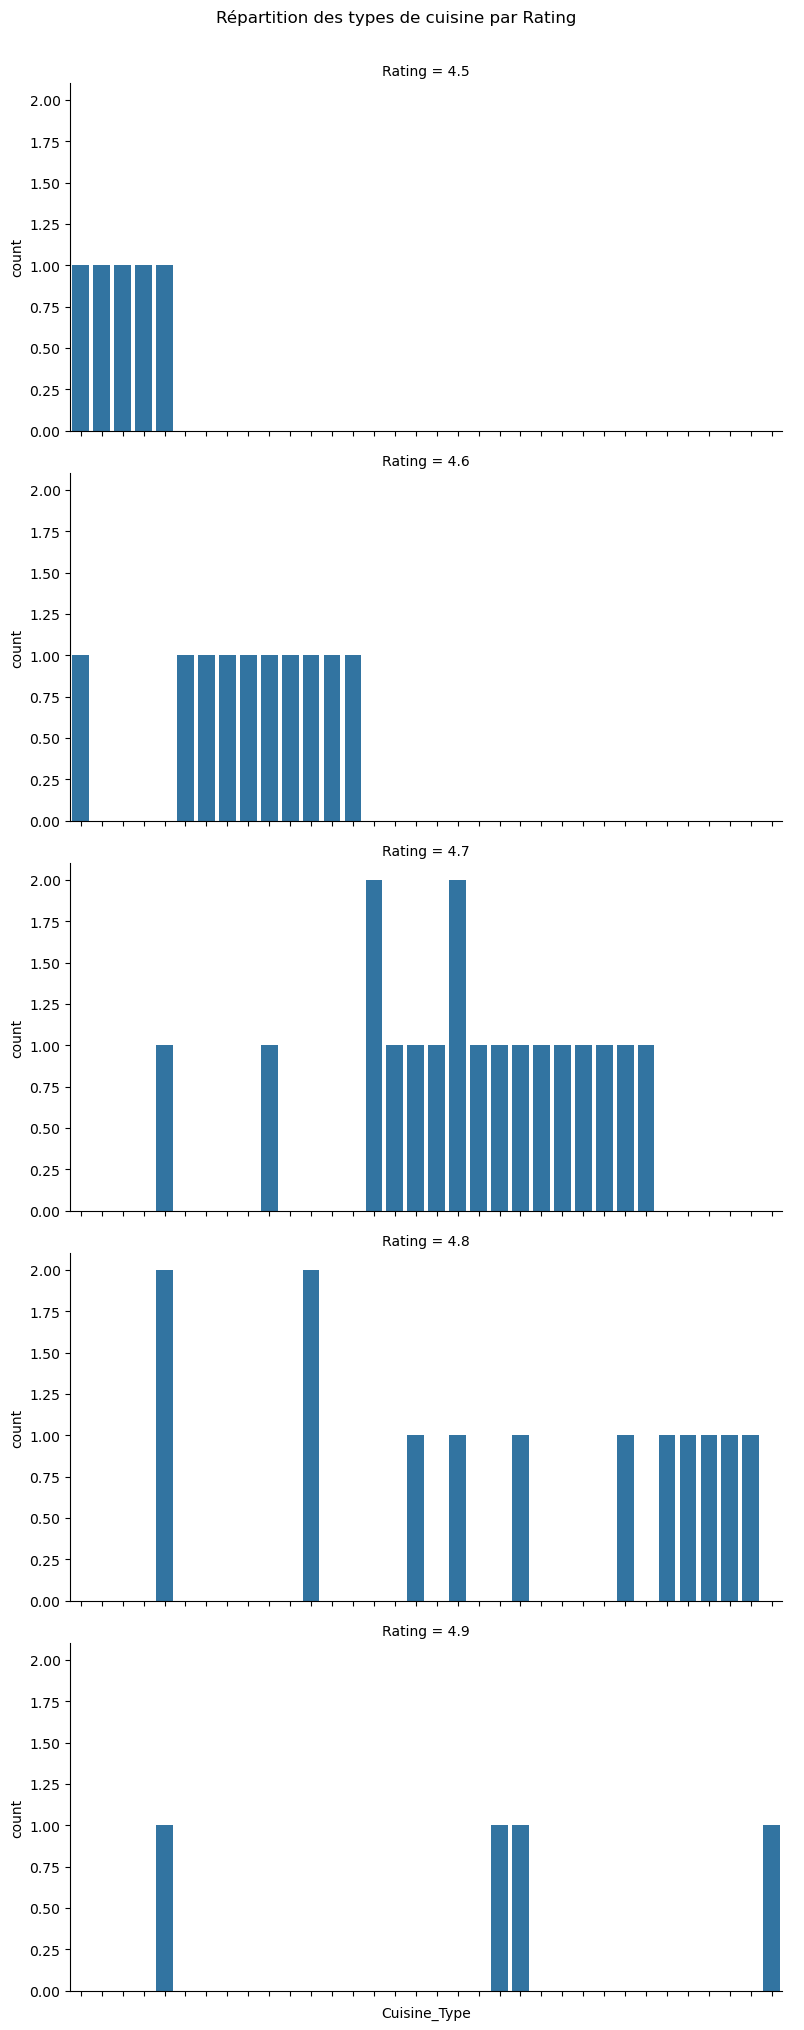

In [29]:
g = sns.catplot(
    data=best_rating,
    x="Cuisine_Type",
    y="count",
    col="Rating",          # <-- un bloc par rating
    kind="bar",
    col_wrap=1,            # tout dans le même graph, blocs empilés verticalement
    height=4,
    aspect=2
)

g.set_xticklabels(rotation=90)
g.fig.suptitle("Distribution of types of cuisine by Rating", y=1.02)
plt.show()

<a id="subsection6"></a>

## 3. ⭐ Analysis "Quality & Prestige"

**Michelin_Stars vs Rating**

Correlation : PearsonRResult(statistic=np.float64(0.6564010635198119), pvalue=np.float64(2.2713223930994383e-07))


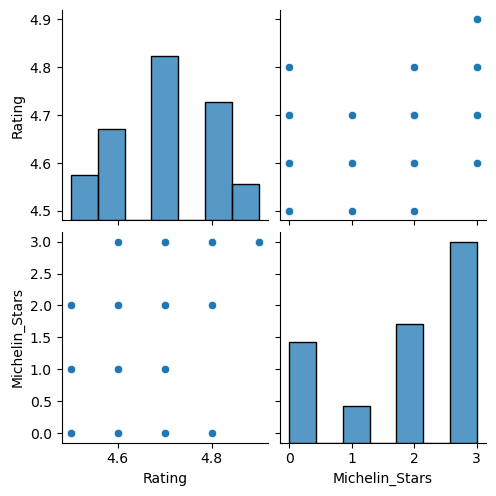

In [30]:
from scipy import stats
print("Correlation :", stats.pearsonr(df['Michelin_Stars'],df["Rating"]))

sns.pairplot(df[["Rating",'Michelin_Stars']])

**Michelin_Stars vs Average_Price_USD**

Correlation : PearsonRResult(statistic=np.float64(0.7108443896657058), pvalue=np.float64(7.3005613207131215e-09))


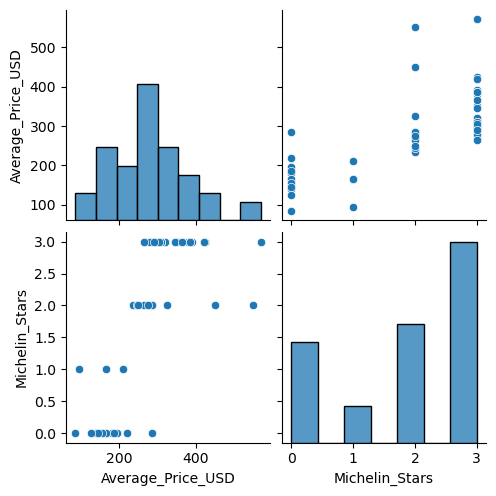

In [31]:
from scipy import stats
print("Correlation :", stats.pearsonr(df['Michelin_Stars'],df["Average_Price_USD"]))

sns.pairplot(df[["Average_Price_USD",'Michelin_Stars']])

**Michelin_Stars vs Seating_Capacity**

Correlation : PearsonRResult(statistic=np.float64(0.04638311729535028), pvalue=np.float64(0.7490783494974483))


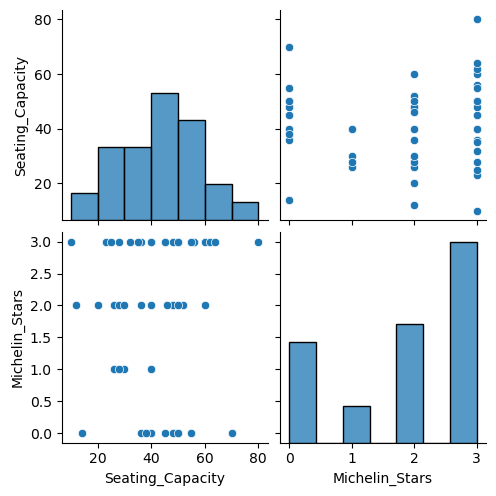

In [32]:
from scipy import stats
print("Correlation :", stats.pearsonr(df['Michelin_Stars'],df["Seating_Capacity"]))

sns.pairplot(df[["Seating_Capacity",'Michelin_Stars']])

**Years_Operating vs Michelin_Stars**

Correlation : PearsonRResult(statistic=np.float64(0.3495393428287459), pvalue=np.float64(0.012841394566707727))


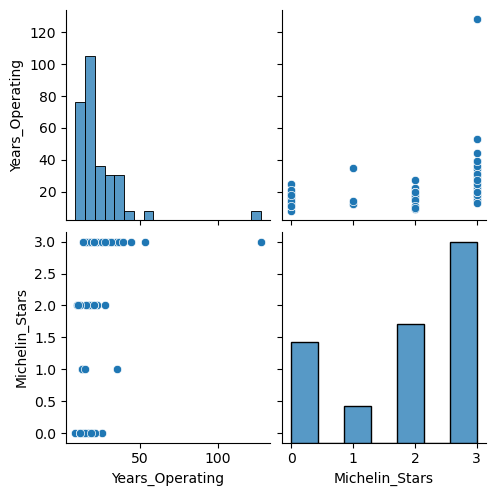

In [33]:
from scipy import stats
print("Correlation :", stats.pearsonr(df['Michelin_Stars'],df["Years_Operating"]))

sns.pairplot(df[["Years_Operating",'Michelin_Stars']])


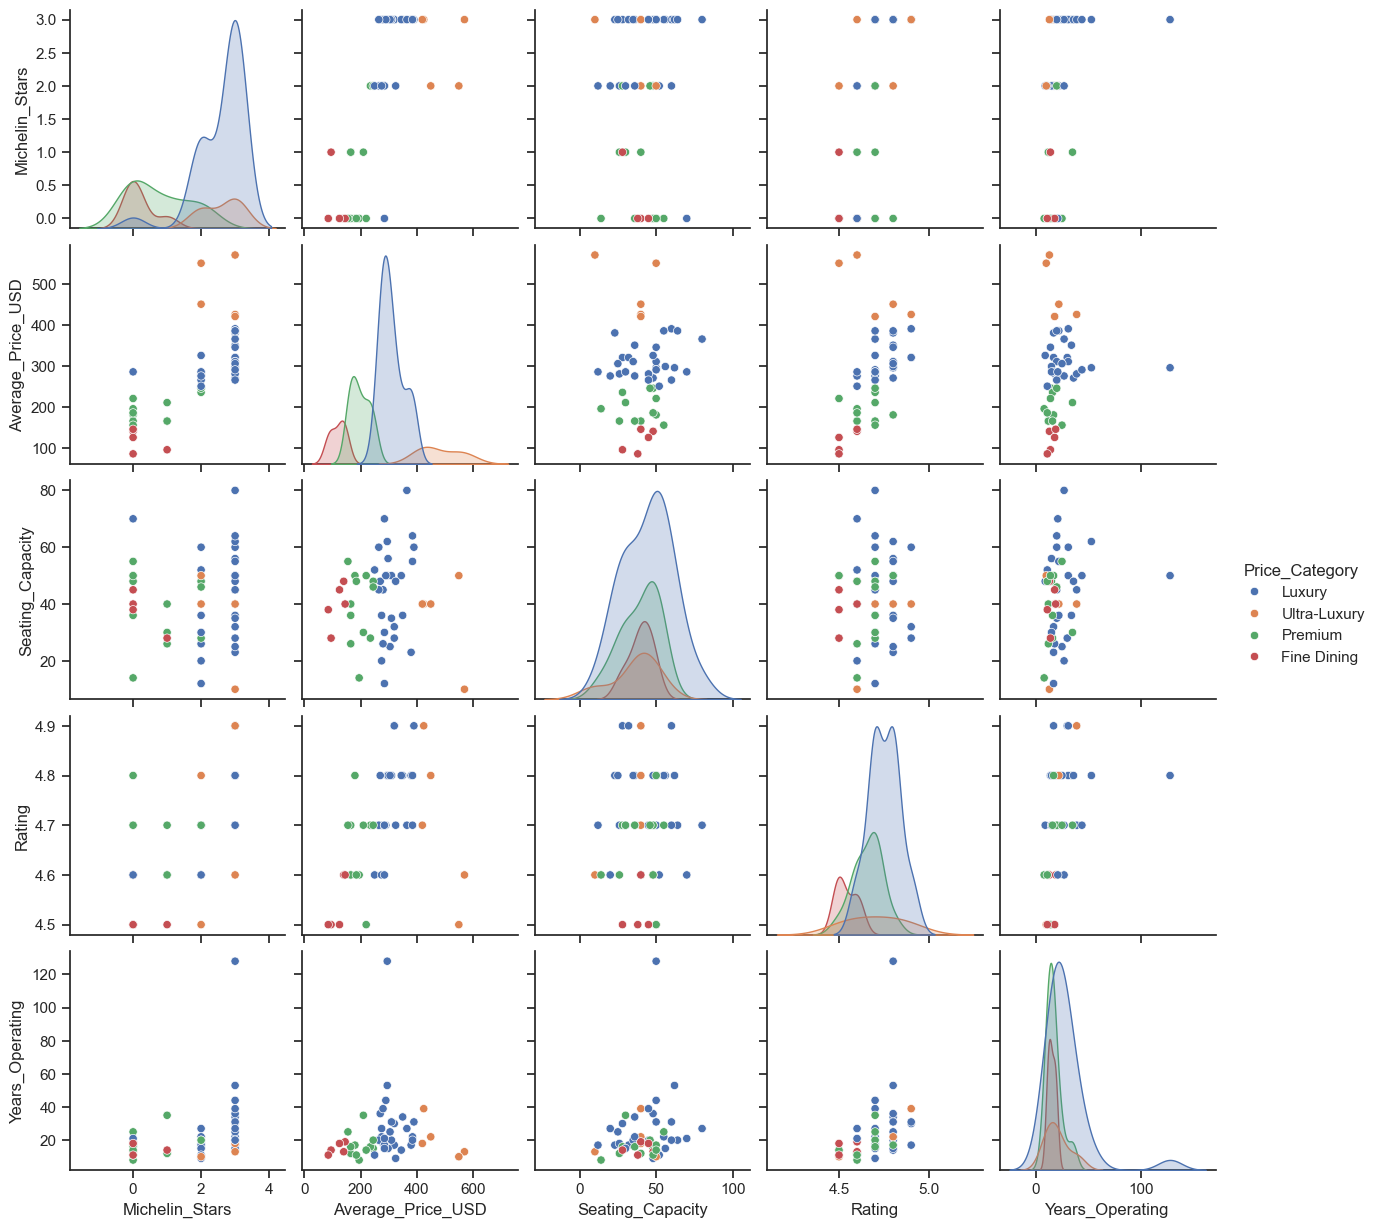

In [34]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue='Price_Category')

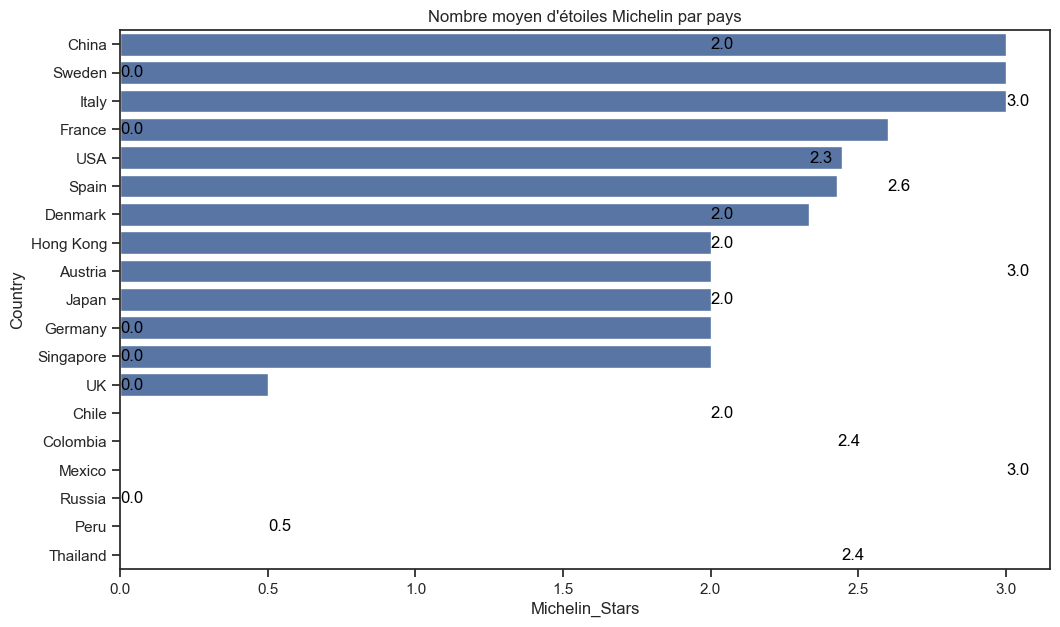

In [35]:
moyenne_star=df.groupby("Country")["Michelin_Stars"].mean().reset_index()
moyenne_star=moyenne_star.sort_values("Michelin_Stars",ascending=False)
moyenne_star

plt.figure(figsize=(12,7))
fig=sns.barplot(data=moyenne_star,x="Michelin_Stars",y="Country")
fig.set(title="Average number of Michelin stars per country")

for index, row in moyenne_star.iterrows():
    fig.text(row.Michelin_Stars,index,round(row.Michelin_Stars,1), color='black',ha="left",va="center")

<a id="subsection7"></a>

## 4. ⭐ Economic analysis

**Average price by country**

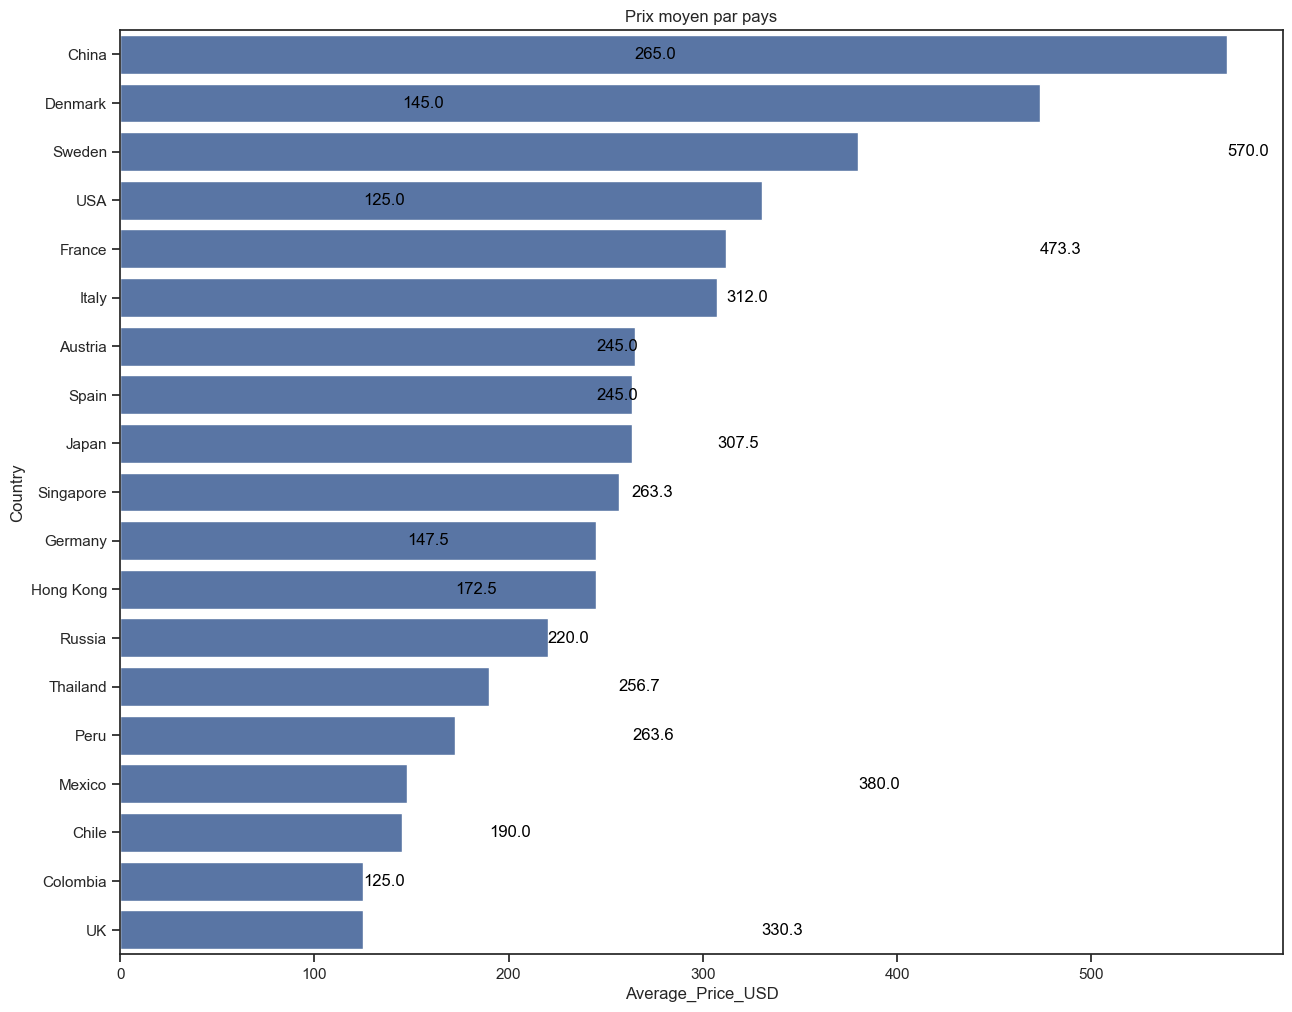

In [36]:
price_country=round(df.groupby("Country")["Average_Price_USD"].mean().reset_index(),1)
price_country=price_country.sort_values("Average_Price_USD",ascending=False)

plt.figure(figsize=(15,12))
fig=sns.barplot(price_country,y="Country",x="Average_Price_USD")
fig.set(title="Average price by country")

for index, row in price_country.iterrows():
    fig.text(row["Average_Price_USD"],index,row["Average_Price_USD"], color='black',ha="left",va="center")

**Average price by type of kitchen**

In [37]:
price_typeCuisine=round(df.groupby("Cuisine_Type")["Average_Price_USD"].mean().reset_index(),1)
price_typeCuisine=price_typeCuisine.sort_values("Average_Price_USD",ascending=False)
price_typeCuisine

,Cuisine_Type,Average_Price_USD
2,Avant-garde,570.0
15,Experimental,550.0
30,New Nordic,435.0
21,French Vegetarian,425.0
19,French Haute Cuisine,385.0
29,Molecular Gastronomy,385.0
32,Nordic Contemporary,380.0
26,Japanese-Californian,325.0
17,French,317.5
9,Contemporary American,316.0


<a id="subsection8"></a>

## 5. ⭐ Geographic analysis

**Top 10 country with best restaurant**

In [39]:
pays=df["Country"].value_counts().head(10)

fig=px.bar(pays,x=pays.index,y=pays.values)
fig.update_layout(
    height=700,
    width=1100,
    title_text="Top 10 countries with the best restaurant",
    showlegend=False
)

fig.show()

**Top 15 city with best restaurant**

In [40]:
city = df["City"].value_counts().reset_index().head(15)  # Top 15 locations
city=city.sort_values(by='count', ascending=True)
fig=px.bar(city,x="count",y="City",color="City",text="count", orientation='h')
fig.update_layout(
    title="Top 15 restaurant per city"
)
fig.show()

**Median Average Price (USD) by Cuisine and Continent**

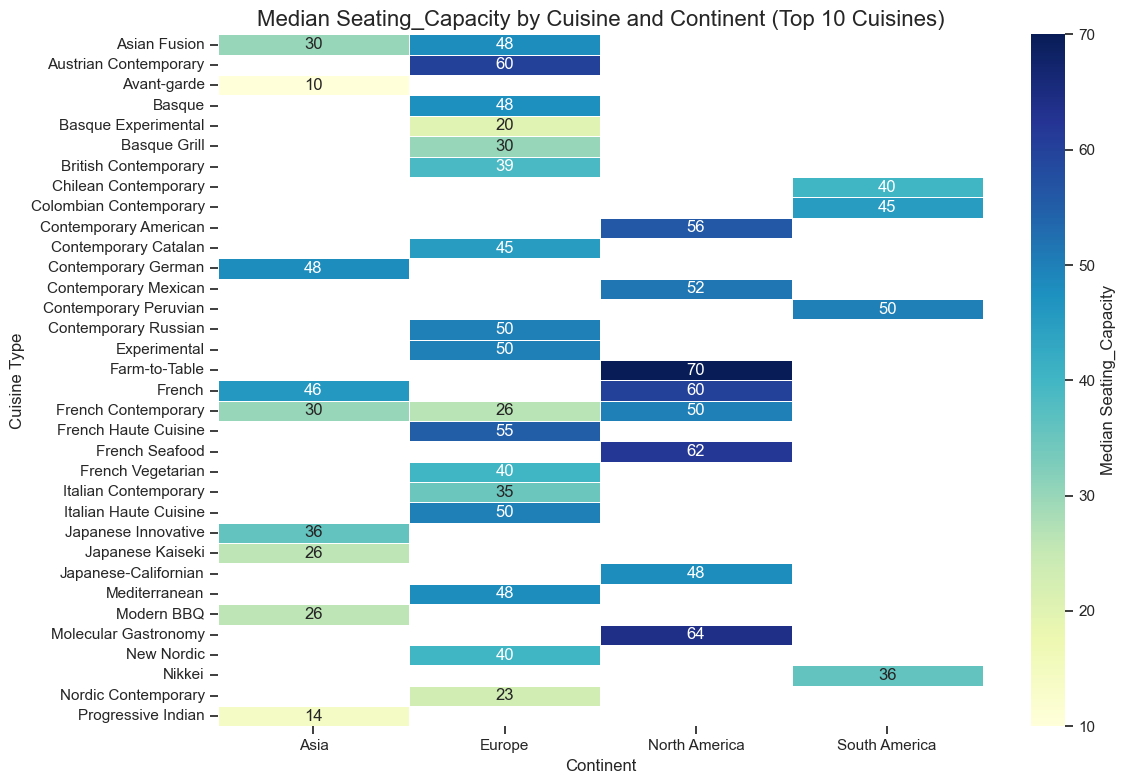

In [41]:
# 1. Calculate the median price for each Cuisine/Continent group
median_price = df.groupby(['Cuisine_Type', 'Continent'])['Seating_Capacity'].median().reset_index()

# 2. Pivot the table for the heatmap
heatmap_data = median_price.pivot(index='Cuisine_Type', columns='Continent', values='Seating_Capacity')

# 3. Create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Median Seating_Capacity'}
)

plt.title('Median Seating_Capacity by Cuisine and Continent (Top 10 Cuisines)', fontsize=16)
plt.ylabel('Cuisine Type', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()

**Average number of Michelin stars by continent and country**

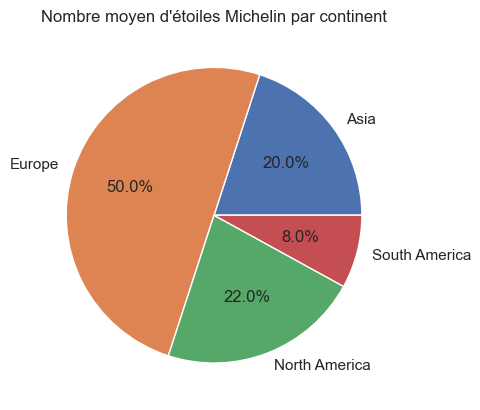

In [42]:
micheline_star=df.groupby("Continent")["Michelin_Stars"].size().reset_index()
micheline_star
#px.pie(micheline_star,labels=micheline_star["Continent"],values=micheline_star["Michelin_Stars"])
plt.pie(micheline_star["Michelin_Stars"], labels=micheline_star["Continent"], autopct="%1.1f%%")
plt.title("Average number of Michelin stars per continent")
plt.show()

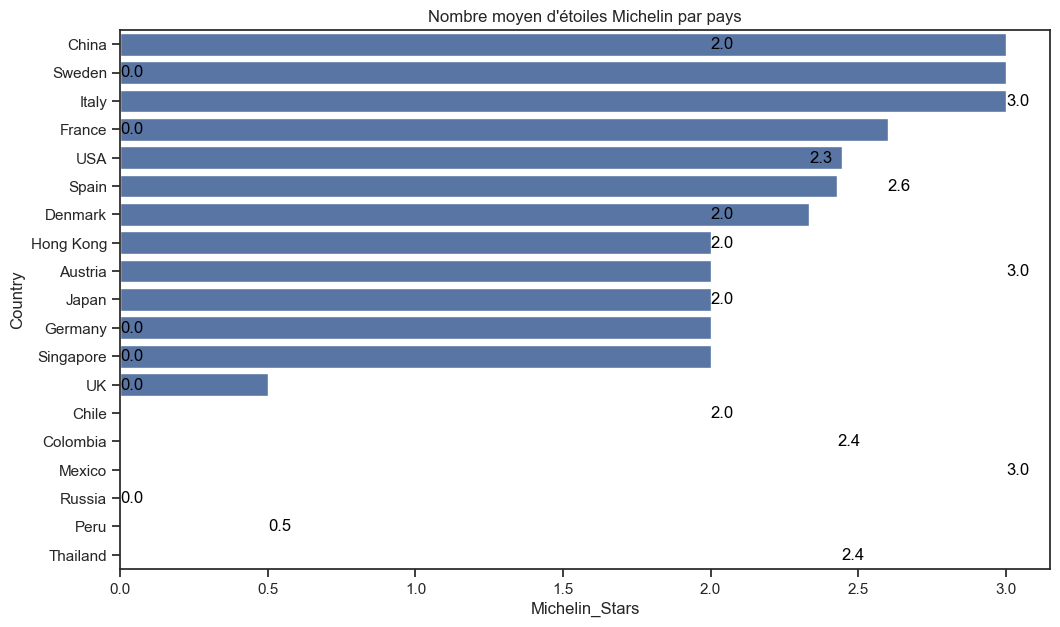

In [43]:
moyenne_star=df.groupby("Country")["Michelin_Stars"].mean().reset_index()
moyenne_star=moyenne_star.sort_values("Michelin_Stars",ascending=False)
moyenne_star

plt.figure(figsize=(12,7))
fig=sns.barplot(data=moyenne_star,x="Michelin_Stars",y="Country")
fig.set(title="Average number of Michelin stars per country")

for index, row in moyenne_star.iterrows():
    fig.text(row.Michelin_Stars,index,round(row.Michelin_Stars,1), color='black',ha="left",va="center")

<Axes: xlabel='Continent', ylabel='Michelin_Stars'>

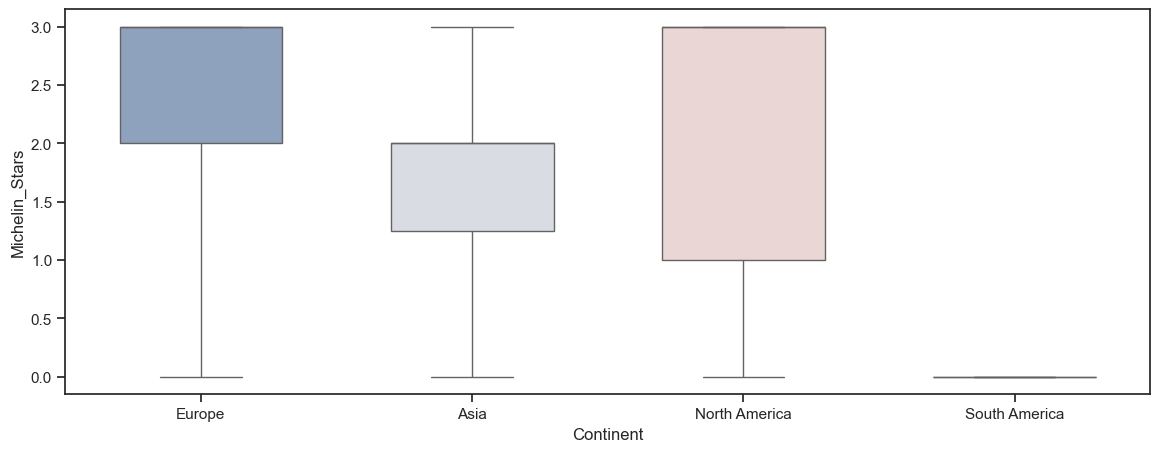

In [44]:
plt.figure(figsize=(14,5))
sns.boxplot(
    df, y="Michelin_Stars", x="Continent", hue="Continent",
    whis=[0, 100], width=.6, palette="vlag"
)

**Price category per continent**

In [45]:
df['Price_Category'].value_counts()

Price_Category
Luxury          28
Premium         12
Ultra-Luxury     5
Fine Dining      5
Name: count, dtype: int64

In [46]:
price_cat=df.groupby(["Price_Category","Restaurant_Name","Continent"]).size().reset_index()
price_cat.columns=["Price_Category","Restaurant_Name","Continent","count"]
price_cat.head(8)

,Price_Category,Restaurant_Name,Continent,count
0,Fine Dining,Boragó,South America,1
1,Fine Dining,Leo,South America,1
2,Fine Dining,Lyle's,Europe,1
3,Fine Dining,Quintonil,North America,1
4,Fine Dining,Septime,Europe,1
5,Luxury,Alinea,North America,1
6,Luxury,Alléno Paris,Europe,1
7,Luxury,Arzak,Europe,1


In [47]:
# Création figure : 2 lignes, 2 colonnes
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Fine Dining", "Luxury", "Premium", "Ultra-Luxury")
)

# hovertext = liste des restaurants pour chaque continent
#hover = grouped["Restaurant_Name"].apply(lambda x: "<br>".join(x)).reindex(counts.index)


# ---- 1. Fine Dining ----
fine_dining = price_cat[price_cat["Price_Category"] == "Fine Dining"]
fd_count = fine_dining.groupby("Continent")["Restaurant_Name"].count()

fig.add_trace(
    go.Bar(
        x=fd_count.index,
        y=fd_count.values,
        marker_color="indianred",
        name="Fine Dining",
        #hovertext=hover,
        #hovertemplate="<b>%{x}</b><br>" +
        #                  "Nombre de restaurants: %{y}<br><br>" +
        #                  "<b>Restaurants :</b><br>%{hovertext}<extra></extra>"
    ),
    row=1, col=1
)

# ---- 2. Luxury ----
luxury = price_cat[price_cat["Price_Category"] == "Luxury"]
lux_count = luxury.groupby("Continent")["Restaurant_Name"].count()

fig.add_trace(
    go.Bar(
        x=lux_count.index,
        y=lux_count.values,
        marker_color="royalblue",
        name="Luxury"
    ),
    row=1, col=2
)

# ---- 3. Premium ----
premium = price_cat[price_cat["Price_Category"] == "Premium"]
prem_count = premium.groupby("Continent")["Restaurant_Name"].count()

fig.add_trace(
    go.Bar(
        x=prem_count.index,
        y=prem_count.values,
        marker_color="seagreen",
        name="Premium"
    ),
    row=2, col=1
)

# ---- 4. Ultra-Luxury ----
ultra = price_cat[price_cat["Price_Category"] == "Ultra-Luxury"]
ultra_count = ultra.groupby("Continent")["Restaurant_Name"].count()

fig.add_trace(
    go.Bar(
        x=ultra_count.index,
        y=ultra_count.values,
        marker_color="goldenrod",
        name="Ultra-Luxury"
    ),
    row=2, col=2
)

# Mise en forme générale
fig.update_layout(
    height=700,
    width=1100,
    title_text="Comparison of the number of restaurants by category and continent",
    showlegend=False
)

fig.show()


**The most present cuisine in each continent**

In [48]:
cusinetype_per_mainland=df.groupby(["Continent","Cuisine_Type"]).size().reset_index()
cusinetype_per_mainland.columns=["Continent","Cuisine_Type","count"]
cusinetype_per_mainland.head()

,Continent,Cuisine_Type,count
0,Asia,Asian Fusion,1
1,Asia,Avant-garde,1
2,Asia,Contemporary German,1
3,Asia,French,1
4,Asia,French Contemporary,2


In [49]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import math

continents = cusinetype_per_mainland["Continent"].unique()
n = len(continents)

# 2 graphiques par ligne
cols = 2
rows = math.ceil(n / cols)

# Création figure
fig = make_subplots(rows=rows, cols=cols, subplot_titles=continents)

index = 0

for r in range(1, rows + 1):
    for c in range(1, cols + 1):
        if index < n:
            cont = continents[index]
            df_temp = cusinetype_per_mainland[cusinetype_per_mainland["Continent"] == cont]
            df_temp=df_temp.sort_values("count")

            fig.add_trace(
                go.Scatter(
                    x=df_temp["Cuisine_Type"],
                    y=df_temp["count"],
                    #text=df_temp["count"],
                    name=cont,
                    mode='markers',
                    marker=dict(
                        color=df_temp['count'],
                        size=df_temp['count']*19.3,
                        showscale=True)
                ),
                row=r,
                col=c
            )

        index += 1

fig.update_layout(
    height=400 * rows,
    width=1200,
    showlegend=False,
    title="Distribution of Type Cuisine by Continent"
)

fig.update_xaxes(tickangle=45)

fig.show()


In [50]:
fig = px.sunburst(cusinetype_per_mainland, path=['Continent','Cuisine_Type'],
                  values='count',color=cusinetype_per_mainland['Continent'],
                  color_continuous_scale='electric')

fig.update_layout(autosize=False,height=700,width=1000)
fig.show()

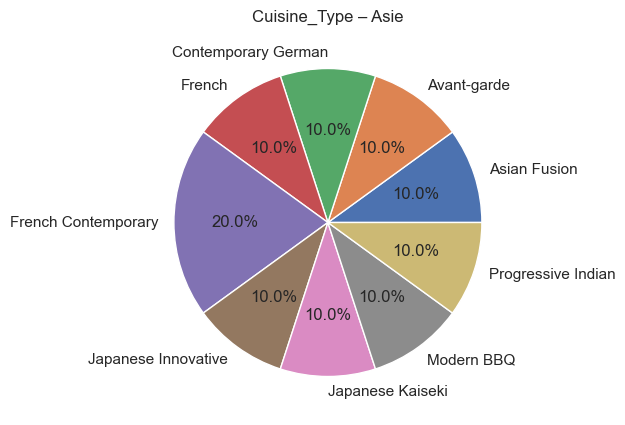

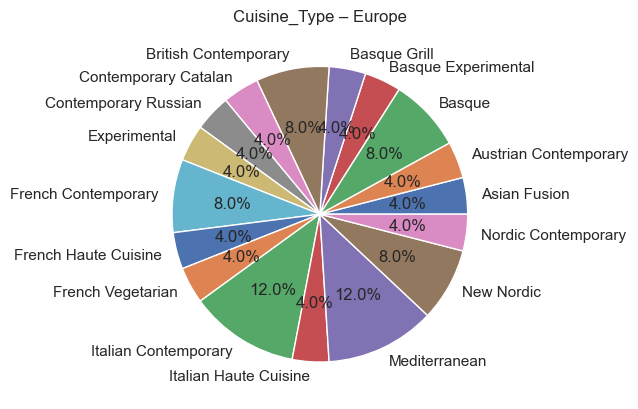

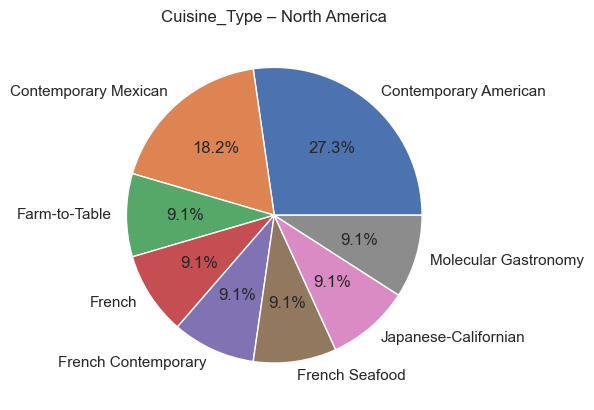

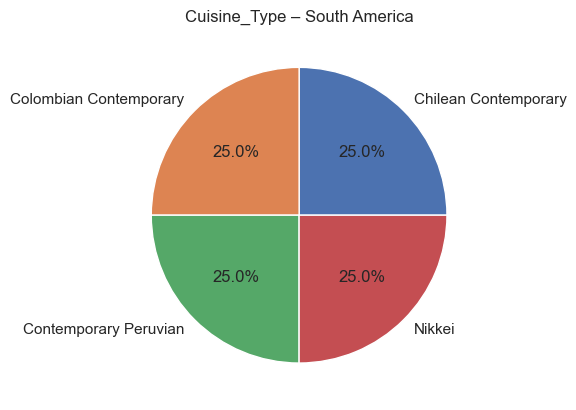

In [51]:
plt.figure(figsize=(14,5))
# Asie
df_asia=cusinetype_per_mainland[cusinetype_per_mainland["Continent"]=="Asia"]
plt.pie(df_asia["count"], labels=df_asia["Cuisine_Type"], autopct="%1.1f%%")
plt.title("Cuisine_Type – Asie")
plt.show()

#Europe
df_europe=cusinetype_per_mainland[cusinetype_per_mainland["Continent"]=="Europe"]
plt.pie(df_europe["count"], labels=df_europe["Cuisine_Type"], autopct="%1.1f%%")
plt.title("Cuisine_Type – Europe")
plt.show()

#Amerique
df_amerique_nord=cusinetype_per_mainland[cusinetype_per_mainland["Continent"]=="North America"]
plt.pie(df_amerique_nord["count"], labels=df_amerique_nord["Cuisine_Type"], autopct="%1.1f%%")
plt.title("Cuisine_Type – North America")
plt.show()


#Afrique
df_amerique_sud=cusinetype_per_mainland[cusinetype_per_mainland["Continent"]=="South America"]
plt.pie(df_amerique_sud["count"], labels=df_amerique_sud["Cuisine_Type"], autopct="%1.1f%%")
plt.title("Cuisine_Type – South America")
plt.show()


<a id="subsection9"></a>

## 6. ⭐ Quality & reputation

* Which countries have the best restaurants (average rating)?
* Are starred restaurants systematically rated better?

In [52]:
star_rating = (
    df.groupby("Michelin_Stars")["Rating"]
      .mean()
      .reset_index()
      .sort_values("Rating", ascending=False)
)

print(star_rating)

   Michelin_Stars    Rating
3               3  4.781818
2               2  4.676923
0               0  4.609091
1               1  4.600000


In [53]:
rating_country=df.groupby("Country")["Rating"].size().reset_index()
rating_country=rating_country.sort_values("Rating",ascending=False)
rating_country["Rating_Category"] = pd.cut(
    rating_country ["Rating"],
    bins=[0, 2, 5, 9],     # intervalles
    labels=["Low", "Medium", "High"],   # catégories
    include_lowest=True
)

rating_country.head(5)

,Country,Rating,Rating_Category
18,USA,9,Élevé
14,Spain,7,Élevé
5,France,5,Moyen
8,Italy,4,Moyen
9,Japan,3,Moyen


Text(0.5, 1.0, 'Les pays selon les rating category des restaurants')

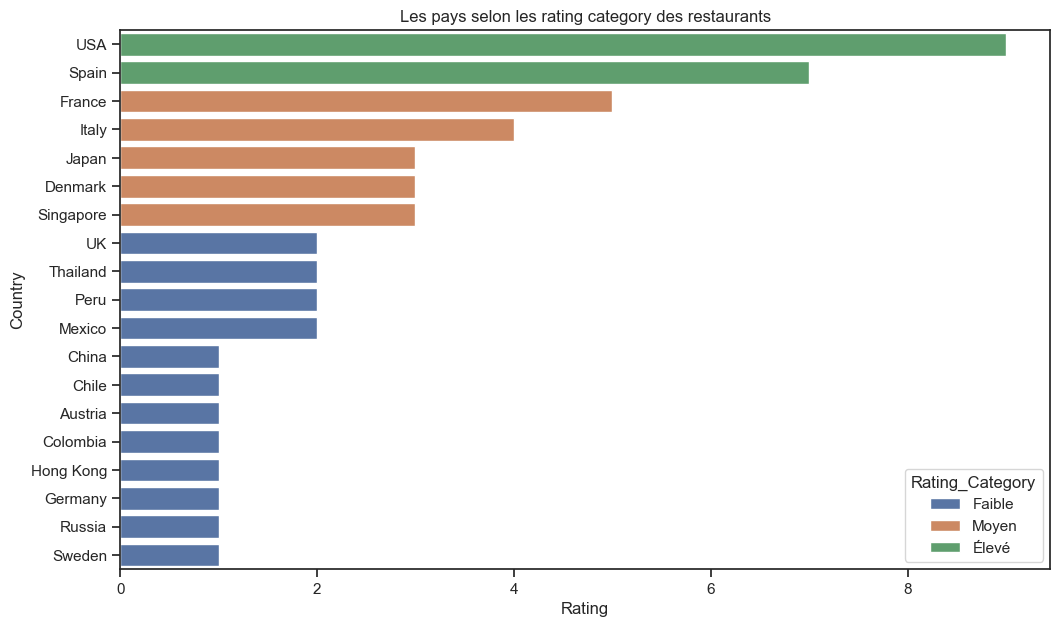

In [54]:
plt.figure(figsize=(12,7))
fig=sns.barplot(data=rating_country,x = 'Rating', y = 'Country', hue = 'Rating_Category')
fig.set_title("Countries according to the rating category of restaurants")

**Distribution of restaurants by Star_Category**

In [55]:
expensive_prices = [320, 390, 425, 350, 380, 295, 310, 345, 298, 385, 270, 305, 280,
                    420, 365, 290, 265, 570, 450, 325, 275, 285, 550]

cheap_prices = [165, 95, 155, 140, 145, 125, 85]

df["expensive_or_not"] = "medium"
df.loc[df["Average_Price_USD"].isin(expensive_prices), "expensive_or_not"] = "expensive"
df.loc[df["Average_Price_USD"].isin(cheap_prices), "expensive_or_not"] = "cheap"

*No Stars*

In [56]:
star=df.Star_Category.value_counts().reset_index()
One_Star=df[df["Star_Category"]=="No Stars"]
One_Star

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("number of places","note", "anciennite", "type of restaurant", "so expensive dish prices", "continent")
)


continent_count=One_Star["Continent"].value_counts()
expensive_or_not_count=One_Star["expensive_or_not"].value_counts()
Price_Category_count=One_Star["Price_Category"].value_counts()

fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Seating_Capacity"]),
    row=1,col=1
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Rating"]),
    row=1,col=2
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Years_Operating"]),
    row=2,col=1
)
fig.add_trace(
    go.Bar(x=Price_Category_count.index,y=Price_Category_count.values),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x=expensive_or_not_count.index,y=expensive_or_not_count.values),
    row=3,col=1
)
fig.add_trace(
    go.Bar(x=continent_count.index,y=continent_count.values),
    row=3,col=2
)


fig.update_layout(
    height=700,
    width=1200,
    showlegend=False,
    title="Distribution restaurant without star by number of seats - rating - anciennite - type of restaurant -if expensive dish prices -continent"
)

fig.show()

*One Star*

In [57]:
star=df.Star_Category.value_counts().reset_index()
One_Star=df[df["Star_Category"]=="One Star"]
One_Star

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("number of places","note", "anciennite", "type of restaurant", "so expensive dish prices", "continent")
)


continent_count=One_Star["Continent"].value_counts()
expensive_or_not_count=One_Star["expensive_or_not"].value_counts()
Price_Category_count=One_Star["Price_Category"].value_counts()

fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Seating_Capacity"]),
    row=1,col=1
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Rating"]),
    row=1,col=2
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Years_Operating"]),
    row=2,col=1
)
fig.add_trace(
    go.Bar(x=Price_Category_count.index,y=Price_Category_count.values),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x=expensive_or_not_count.index,y=expensive_or_not_count.values),
    row=3,col=1
)
fig.add_trace(
    go.Bar(x=continent_count.index,y=continent_count.values),
    row=3,col=2
)


fig.update_layout(
    height=700,
    width=1200,
    showlegend=False,
    title="Distribution restaurant two stars per nbr of seats - note - anciennite - type of restaurant -if expensive dish prices -continent"
)

fig.show()

*Two Stars*

In [58]:
star=df.Star_Category.value_counts().reset_index()
One_Star=df[df["Star_Category"]=="Two Stars"]
One_Star

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("number of places","note", "anciennite", "type of restaurant", "so expensive dish prices", "continent")
)


continent_count=One_Star["Continent"].value_counts()
expensive_or_not_count=One_Star["expensive_or_not"].value_counts()
Price_Category_count=One_Star["Price_Category"].value_counts()

fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Seating_Capacity"]),
    row=1,col=1
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Rating"]),
    row=1,col=2
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Years_Operating"]),
    row=2,col=1
)
fig.add_trace(
    go.Bar(x=Price_Category_count.index,y=Price_Category_count.values),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x=expensive_or_not_count.index,y=expensive_or_not_count.values),
    row=3,col=1
)
fig.add_trace(
    go.Bar(x=continent_count.index,y=continent_count.values),
    row=3,col=2
)


fig.update_layout(
    height=700,
    width=1200,
    showlegend=False,
    title="Distribution restaurant two stars per nbr of seats - note - anciennite - type of restaurant -if expensive dish prices -continent"
)

fig.show()

*Three Stars*

In [59]:
star=df.Star_Category.value_counts().reset_index()
One_Star=df[df["Star_Category"]=="Three Stars"]
One_Star

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("number of places","note", "anciennite", "type of restaurant", "so expensive dish prices", "continent")
)


continent_count=One_Star["Continent"].value_counts()
expensive_or_not_count=One_Star["expensive_or_not"].value_counts()
Price_Category_count=One_Star["Price_Category"].value_counts()

fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Seating_Capacity"]),
    row=1,col=1
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Rating"]),
    row=1,col=2
)
fig.add_trace(
    go.Bar(x=One_Star["Restaurant_Name"],y=One_Star["Years_Operating"]),
    row=2,col=1
)
fig.add_trace(
    go.Bar(x=Price_Category_count.index,y=Price_Category_count.values),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x=expensive_or_not_count.index,y=expensive_or_not_count.values),
    row=3,col=1
)
fig.add_trace(
    go.Bar(x=continent_count.index,y=continent_count.values),
    row=3,col=2
)


fig.update_layout(
    height=1000,
    width=1200,
    showlegend=False,
    title="Distribution restaurant three stars by number of seats - note - anciennite - type of restaurant -if expensive dish prices -continent"
)
plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

**restaurants by continent**

In [60]:
map_continent=df.value_counts('Country').reset_index()
map_continent.columns=["Country","Restaurant_Count"]
map_continent.head(5)

,Country,Restaurant_Count
0,USA,9
1,Spain,7
2,France,5
3,Italy,4
4,Japan,3


In [61]:
fig = px.choropleth(
    map_continent,
    locations="Country",
    locationmode="country names",
    color="Restaurant_Count",
    hover_name="Country",
    hover_data={"Restaurant_Count": True},
    color_continuous_scale="Viridis",
    title="Number of restaurants by continent"
)
fig.update_layout(autosize=False,height=700,width=1300)
fig.show()


**Rating map per country**

In [62]:
rating_map=round(df.groupby("Country")["Rating"].mean().reset_index(),1)
rating_map.head(5)

,Country,Rating
0,Austria,4.7
1,Chile,4.6
2,China,4.6
3,Colombia,4.5
4,Denmark,4.7


In [63]:
fig = px.choropleth(
    rating_map,
    locations="Country",
    locationmode="country names",
    color="Rating",
    hover_name="Country",
    hover_data={"Rating": True},
    color_continuous_scale="Viridis",
    title="Rating MAP per country"
)
fig.update_layout(autosize=False,height=700,width=1300)
fig.show()


**Heatmap price per City**

In [64]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="restaurant_geocoder")

def geocode_city(city, country):
    try:
        location = geolocator.geocode(f"{city}, {country}")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Appliquer
latitudes = []
longitudes = []

for _, row in df.iterrows():
    lat, lon = geocode_city(row["City"], row["Country"])
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  # IMPORTANT (évite le blocage)

df["Latitude"] = latitudes
df["Longitude"] = longitudes

In [65]:
df.head(2)

,Restaurant_Name,City,Country,Cuisine_Type,Michelin_Stars,Average_Price_USD,Chef,Seating_Capacity,Rating,Signature_Dish,Years_Operating,Price_Category,Star_Category,Continent,expensive_or_not,Latitude,Longitude
0,Osteria Francescana,Modena,Italy,Italian Contemporary,3,320,Massimo Bottura,28,4.9,Five Ages of Parmigiano,30,Luxury,Three Stars,Europe,expensive,44.538473,10.935961
1,Odette,Singapore,Singapore,French Contemporary,3,320,Julien Royer,32,4.9,Hokkaido Sea Urchin,17,Luxury,Three Stars,Asia,expensive,1.357107,103.819499


In [66]:
import plotly.express as px

fig = px.density_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    z='Average_Price_USD',
    radius=20,
    center=dict(lat=20, lon=0),
    zoom=1,
    mapbox_style="carto-positron"
)

fig.show()

<a id="subsection10"></a>

## 7. ⭐ Heatmap of Numerical variable

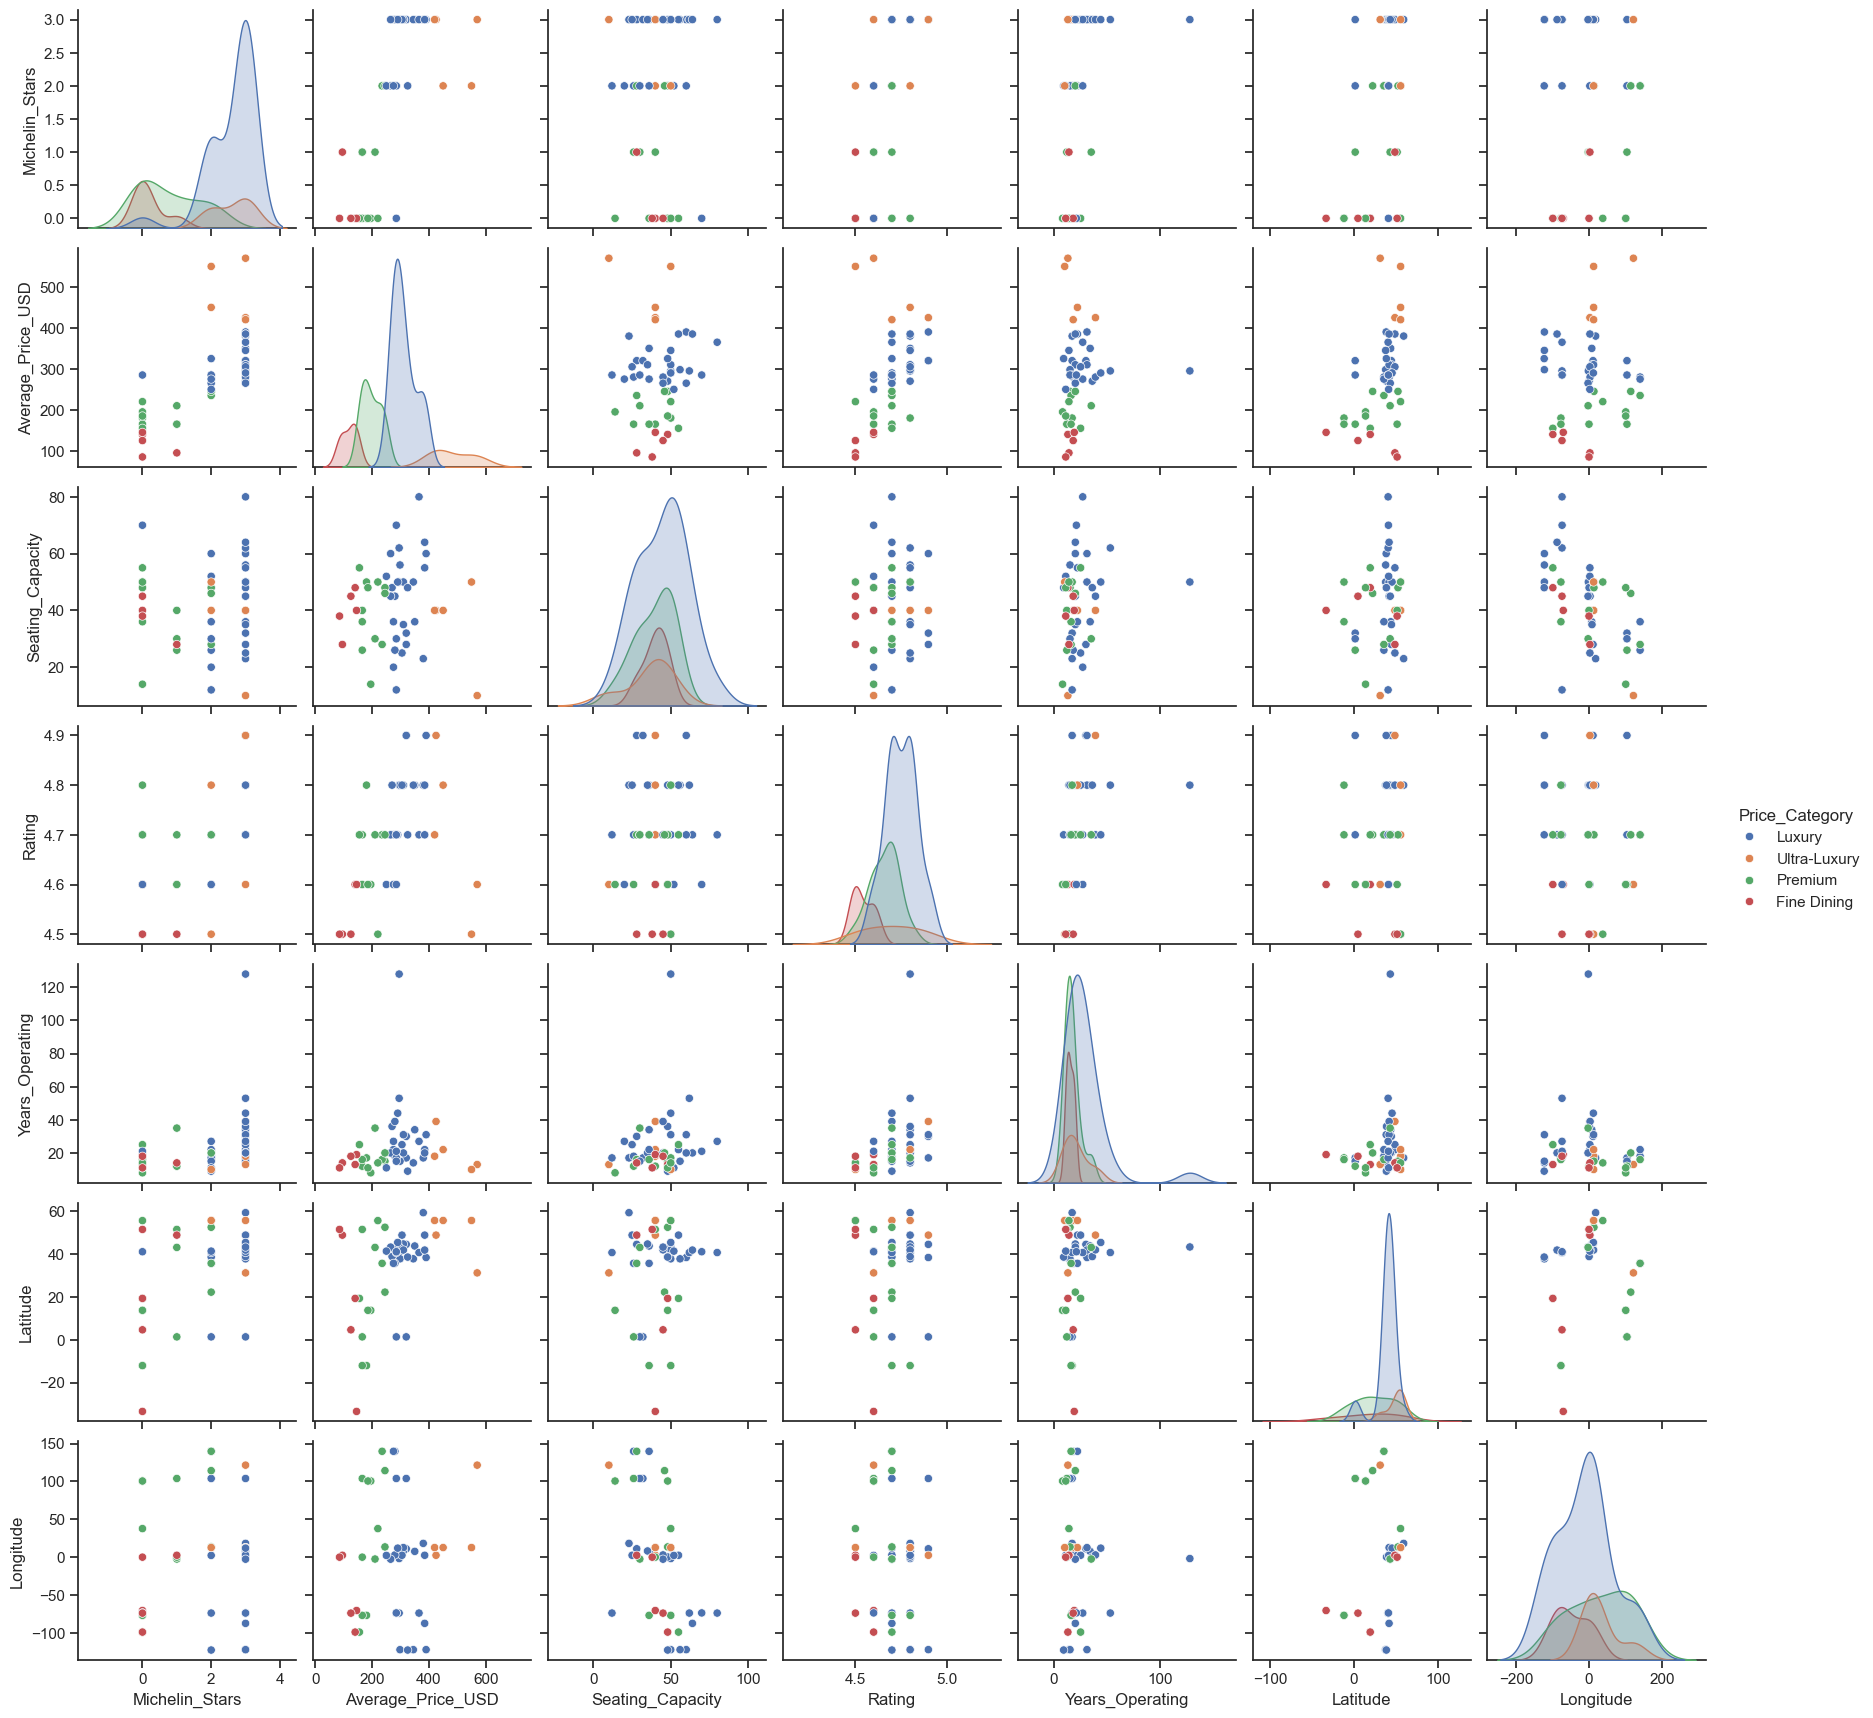

In [67]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue='Price_Category')

<Axes: >

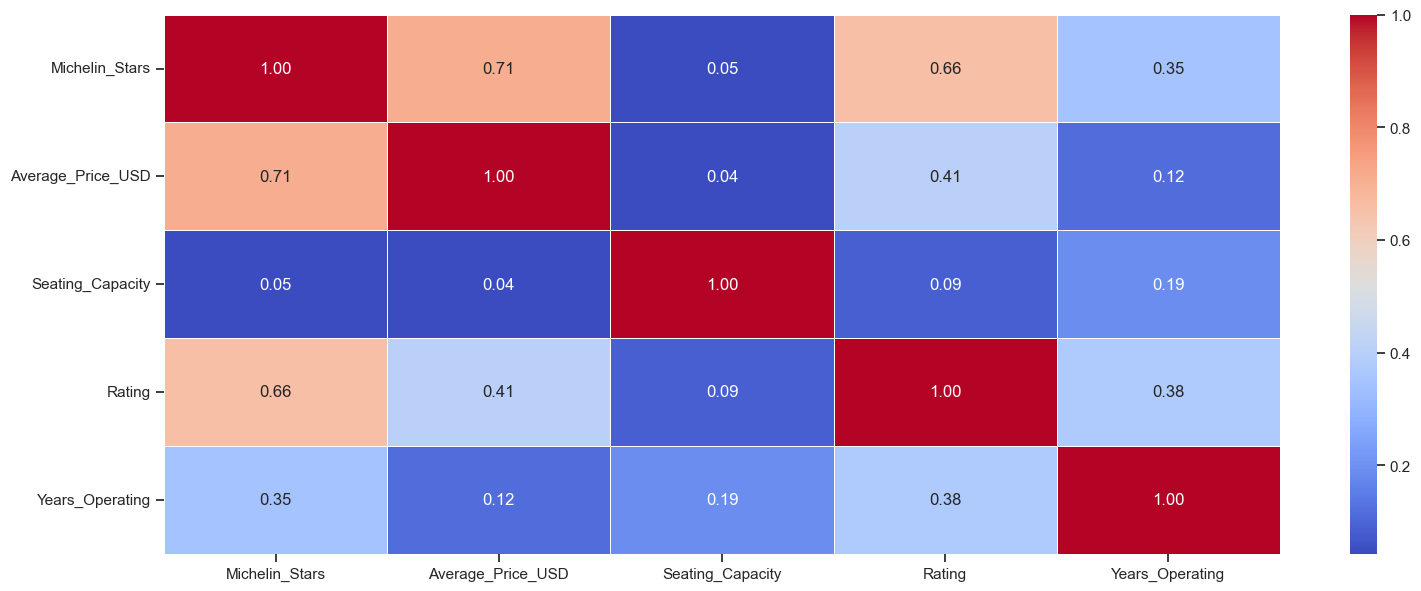

In [68]:
numerical_data=df[["Michelin_Stars","Average_Price_USD","Seating_Capacity","Rating","Years_Operating"]]
correlation=numerical_data.corr()
plt.figure(figsize=(18,7))
sns.heatmap(correlation, annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)

<a id="section4"></a>
# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>4) Outliers<h1>

<Axes: >

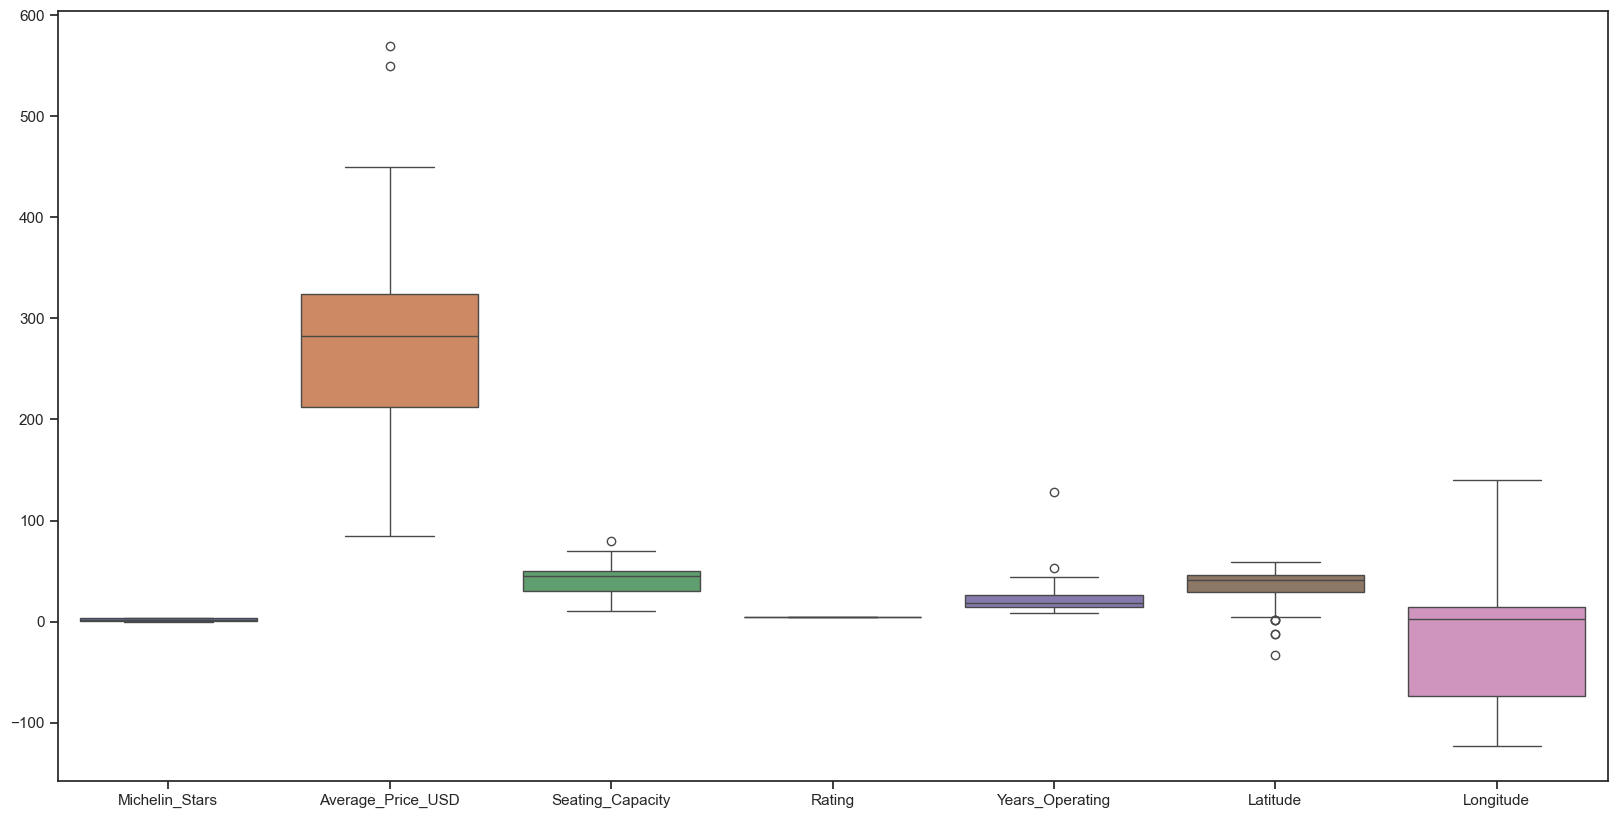

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [70]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

list=["Michelin_Stars","Average_Price_USD","Seating_Capacity","Rating","Years_Operating"]
for i in list:
    detect_outliers_zscore(df[i])
    print(f"Outliers {i} from Z-scores method: ", detect_outliers_zscore(df[i]))

Outliers Michelin_Stars from Z-scores method:  []
Outliers Average_Price_USD from Z-scores method:  []
Outliers Seating_Capacity from Z-scores method:  []
Outliers Rating from Z-scores method:  []
Outliers Years_Operating from Z-scores method:  [128, 128]


In [71]:
import numpy as np
import seaborn as sns
# jr_boxing_weight_categories

list=["Michelin_Stars","Average_Price_USD","Seating_Capacity","Rating","Years_Operating"]
for i in list:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)
    IQR = Q3 - Q1
    print('Interquartile range is', IQR)
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('low_limit is', low_lim)
    print('up_limit is', up_lim)
    outlier =[]
    for x in df[i]:
        if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
    print(f'{i} : outlier in the dataset is', outlier)
    print("___")

Interquartile range is 2.0
low_limit is -2.0
up_limit is 6.0
Michelin_Stars : outlier in the dataset is []
___
Interquartile range is 111.25
low_limit is 45.625
up_limit is 490.625
Average_Price_USD : outlier in the dataset is [570, 550]
___
Interquartile range is 19.5
low_limit is 1.25
up_limit is 79.25
Seating_Capacity : outlier in the dataset is [80]
___
Interquartile range is 0.20000000000000018
low_limit is 4.299999999999999
up_limit is 5.1
Rating : outlier in the dataset is []
___
Interquartile range is 12.25
low_limit is -4.125
up_limit is 44.875
Years_Operating : outlier in the dataset is [53, 128]
___


* **Average price :**
    * Outliers detected: [570, 550].
    * Interpretation: These are probably luxurious restaurants and the price is normal.

* **Seating_Capacity :**
    * Detected outliers: [80].
    * Interpretation: it is possible to have restaurants that are too big, knowing that there are premium restaurants

* **Years_Operating :**
    * Detected outliers: [53, 128].
    * Interpretation: Some restaurants were created a long time ago. Which is normal to have restaurants that are 53 or 128 years old.

<a id="section5"></a>
# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>5) Feature Enginering <h1>

In [72]:
df["price_per_star"]=round(df["Average_Price_USD"]/df["Michelin_Stars"],2)

In [73]:
df["experience_score"]=df["Years_Operating"]*df['Rating']

In [74]:
df["quality_index"] = df["Rating"] * df["Michelin_Stars"]

In [75]:
df["price_log"]=np.sqrt(df["Average_Price_USD"])

In [76]:
df["prestige_score"] = df["Rating"] + df["Michelin_Stars"] + df["price_log"]

In [77]:
df["seats_per_star"] = df["Seating_Capacity"] / df["Michelin_Stars"]

In [78]:
# @title
#import numpy as np

#conditions = [
#    df1["Years_Operating"] < 10,
#   (df1["Years_Operating"] >= 10) & (df1["Years_Operating"] <= 50),
#    df1["Years_Operating"] > 50
#]

#choices = ["New", "Established", "Historic"]

#df1["restaurant_category_age"] = np.select(conditions, choices)

#df1["restaurant_category_age"] = df1["Years_Operating"].map(
#    lambda x: "New" if x < 10 else "Established" if x <= 50 else "Historic"
#)


for i,age in enumerate(df.Years_Operating):
  if age<10:
    df.loc[i,"restaurant_category_age"]="New"
  elif 10<= age <=50  :
    df.loc[i,"restaurant_category_age"]="Established"
  else:
    df.loc[i,"restaurant_category_age"]="Historic"



<a id="section6"></a>
# <h1 style='text-align:center;height:40px;font-size:30px;background-color:CRIMSON;border:20px;color:white;border-radius:5px'>6) **Digital variable transformation (log/sqrt)** <h1>

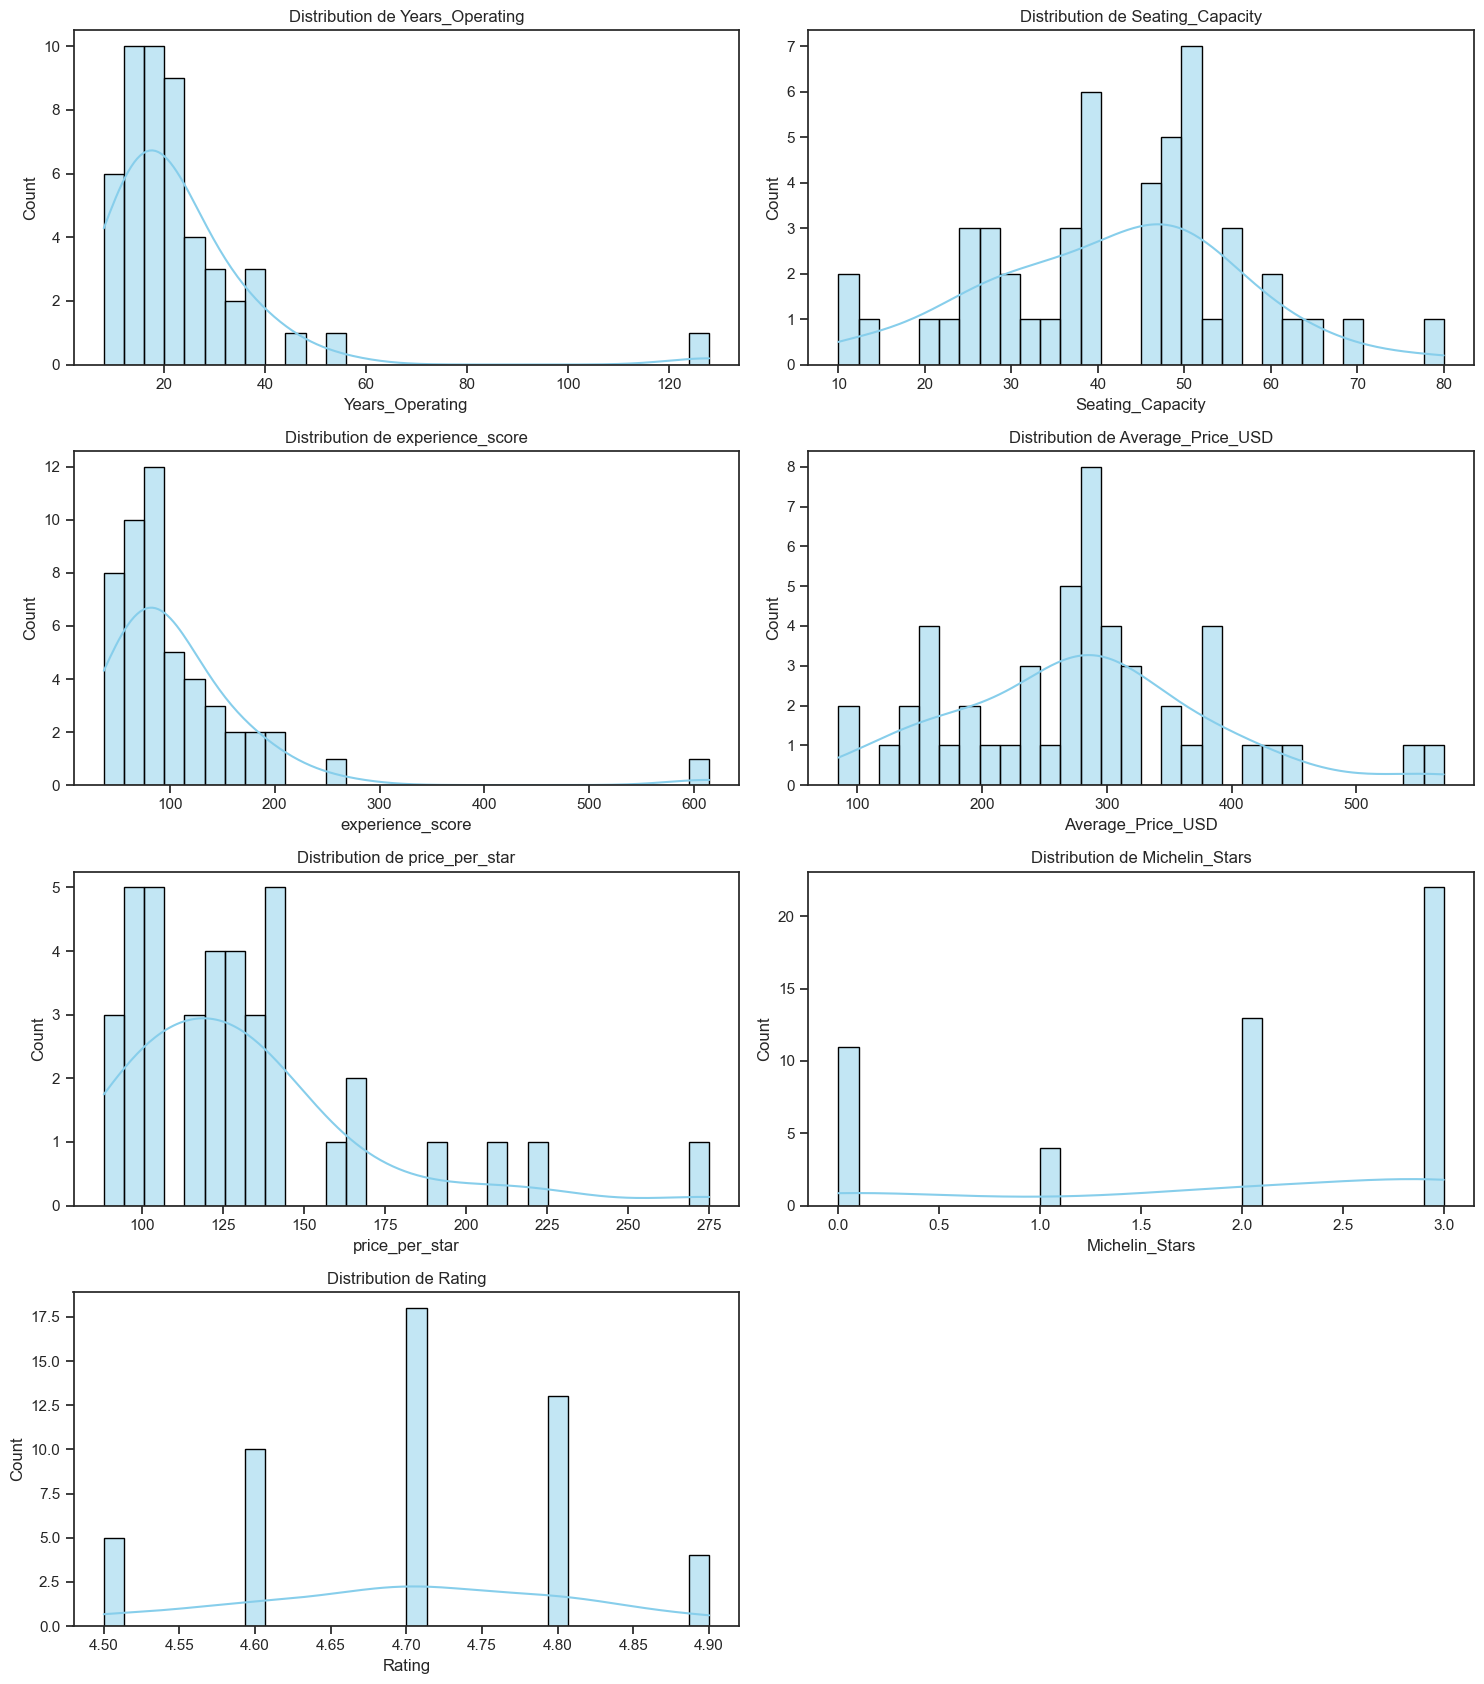

In [79]:
plt.figure(figsize=(15,17))
plt.subplot(4, 2, 1)
sns.histplot(data=df,x="Years_Operating",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de Years_Operating")

plt.subplot(4, 2, 2)
sns.histplot(data=df,x="Seating_Capacity",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de Seating_Capacity")

plt.subplot(4, 2, 3)
sns.histplot(data=df,x="experience_score",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de experience_score")

plt.subplot(4, 2, 4)
sns.histplot(data=df,x="Average_Price_USD",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de Average_Price_USD")

plt.subplot(4, 2, 5)
sns.histplot(data=df,x="price_per_star",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de price_per_star")

plt.subplot(4, 2, 6)
sns.histplot(data=df,x="Michelin_Stars",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de Michelin_Stars")

plt.subplot(4, 2, 7)
sns.histplot(data=df,x="Rating",kde=True,bins=30,color="skyblue",edgecolor="black")
plt.title("Distribution de Rating")

plt.tight_layout()
plt.show()

In [80]:
df["Seating_Capacity"]=np.sqrt(df["Seating_Capacity"])
df["price_log"]=np.sqrt(df["Average_Price_USD"])
df["Years_Operating"]=np.log(df["Years_Operating"]+1)
df["experience_score"]=np.log(df["experience_score"])
df["price_per_star"]=np.sqrt(df["price_per_star"])